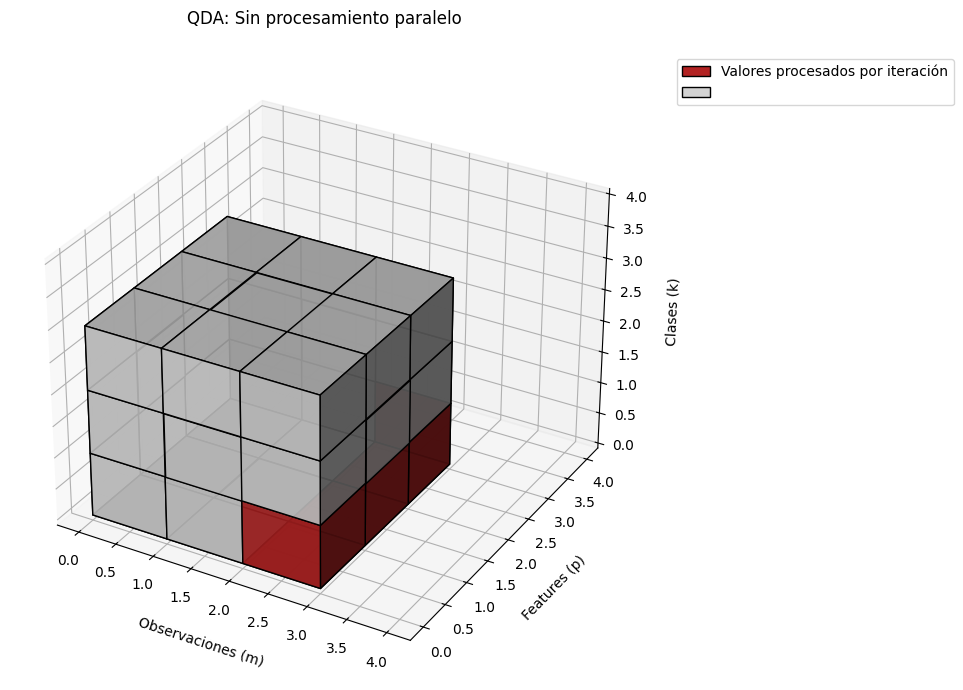

In [44]:
# Imports necesarios
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.patches import Patch



# Función para graficar un cubo con zonas resaltadas
def plot_qda_model_cube(model_name, highlight_coords, color, explanation):
    n, p, k = 3, 3, 3  # dimensiones: observaciones, features, clases
    x, y, z = np.indices((n+1, p+1, k+1))
    voxels = (x < n) & (y < p) & (z < k)

    # Inicializar todos los colores como gris claro
    colors = np.full(voxels.shape, 'lightgray', dtype=object)

    # Asignar color resaltado a las coordenadas indicadas
    for i, j, l in highlight_coords:
        colors[i, j, l] = color

    # Crear la figura
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(voxels, facecolors=colors, edgecolor='k', alpha=0.9)

    # Etiquetas de los ejes
    ax.set_xlabel('Observaciones (m)', labelpad=10)
    ax.set_ylabel('Features (p)', labelpad=10)
    ax.set_zlabel('Clases (k)', labelpad=10)
    ax.set_title(f'{model_name}: {explanation}', pad=20)

    # Leyenda
    legend_elements = [
        Patch(facecolor=color, edgecolor='k', label='Valores procesados por iteración'),
        Patch(facecolor='lightgray', edgecolor='k')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.tight_layout()
    plt.savefig(f'{model_name} - {explanation}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Coordenadas resaltadas para QDA clásico: loop sobre observaciones (i == 0) y clases (k == 0)
highlight_qda = [
    (i, j, k) for i in range(3) for j in range(3) for k in range(3)
    if i == 2 and k == 0
]



# Ejecutar gráfico
plot_qda_model_cube(
    model_name="QDA",
    highlight_coords=highlight_qda,
    color='firebrick',
    explanation="Sin procesamiento paralelo"
)


### QDA clásico

El modelo QDA tradicional realiza predicciones utilizando **dos bucles explícitos**:

- Uno sobre las observaciones (`n`)
- Otro sobre las clases (`k`)

Para cada observación, se calcula la función cuadrática discriminante para cada clase, uno por uno.

---

**En el cubo**:
- Las celdas rojas (`firebrick`) muestran las zonas que se procesan secuencialmente a través de estos bucles.
- Las celdas grises son regiones que **no se procesan simultáneamente** en esta versión.

Este enfoque es computacionalmente costoso, especialmente para grandes cantidades de datos.


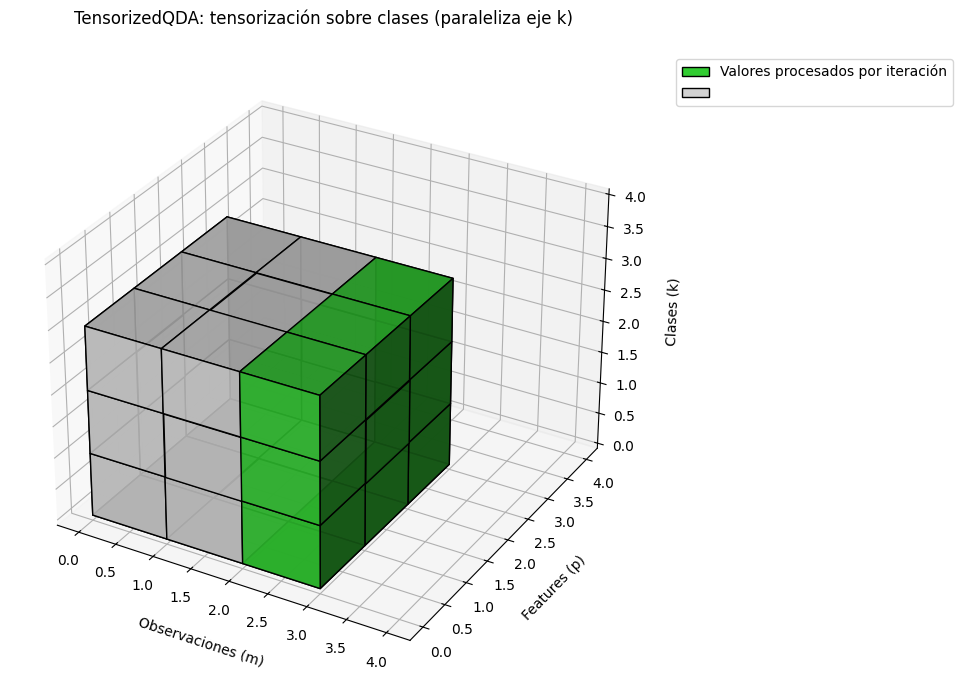

In [45]:
# Cubo para TensorizedQDA: se eliminan los loops sobre clases (se tensoriza en k)
highlight_tensorized = [(i, j, k) for i in range(3) for j in range(3) for k in range(3) if i == 2]

plot_qda_model_cube(
    model_name="TensorizedQDA",
    highlight_coords=highlight_tensorized,
    color='limegreen',
    explanation="tensorización sobre clases (paraleliza eje k)"
)


### TensorizedQDA

Este modelo mejora el QDA clásico al **eliminar el bucle sobre las clases** (`k`) y reemplazarlo por una operación vectorizada.

- Se procesan todas las clases simultáneamente mediante **tensorización** sobre el eje `k`.
- Sin embargo, todavía queda el bucle sobre las observaciones (`n`), por lo que no alcanza la eficiencia total.
- Esta optimización mejora significativamente el tiempo sin alterar el resultado de las predicciones.

En el cubo:
- Las celdas verdes representan las regiones que **se procesan en paralelo sobre las clases**.
- Las grises indican regiones no procesadas directamente en esta versión del modelo.


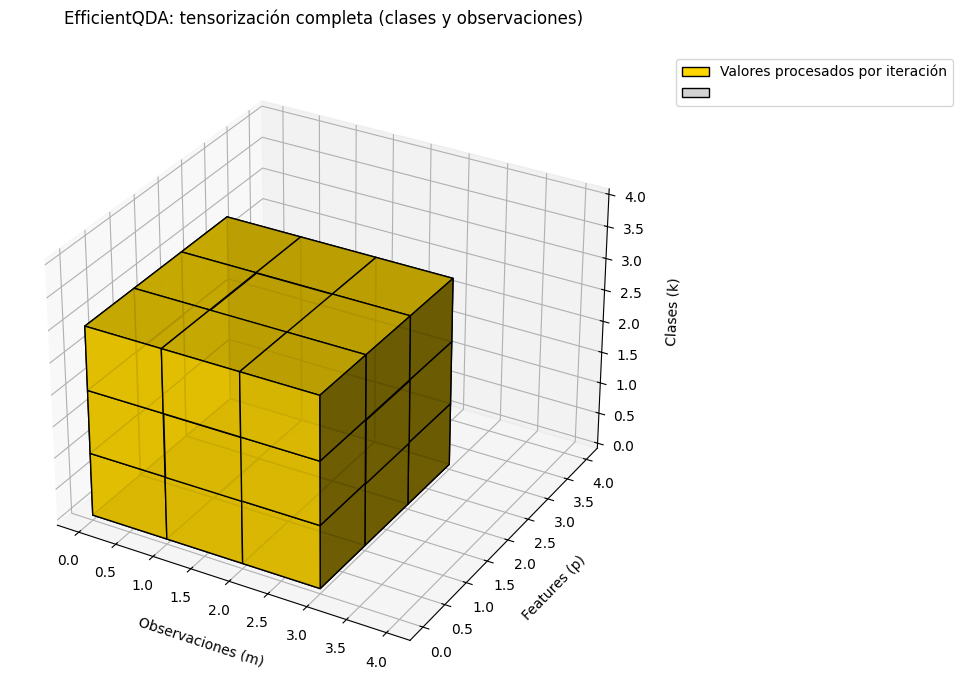

In [46]:
# Ejecutar el gráfico
plot_qda_model_cube(
    model_name="EfficientQDA",
    highlight_coords=highlight_efficient,
    color='gold',
    explanation="tensorización completa (clases y observaciones)"
)
